In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data

In [2]:
df = pd.read_csv('..\\data\\cleaned_heart_disease.csv')
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,num
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.791667,0.622642,0.365297,0.282443,0.241935,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [3]:
y= df['num']
x= df.drop('num',axis=1)

# Apply PCA

In [4]:
pca =PCA()
df_pca = pca.fit_transform(x)

# optimal number of principal components

In [5]:
explained_variace_retio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variace_retio)

for index , evr in enumerate(cumulative_variance):

    print(f"PC{index} : {evr}")

PC0 : 0.23419881298639733
PC1 : 0.3598273691316499
PC2 : 0.4697587308881766
PC3 : 0.5572398927323784
PC4 : 0.6355146611574013
PC5 : 0.6986355449014314
PC6 : 0.7610584942716935
PC7 : 0.8145533434386808
PC8 : 0.8562673080957267
PC9 : 0.8879685158132035
PC10 : 0.9132177812600158
PC11 : 0.9353532298217098
PC12 : 0.9538427868952019
PC13 : 0.9713175916635217
PC14 : 0.9796065443702973
PC15 : 0.9850787702663655
PC16 : 0.9899574586456037
PC17 : 0.9938682397365902
PC18 : 0.9973083864051892
PC19 : 1.0
PC20 : 1.0
PC21 : 1.0
PC22 : 1.0
PC23 : 1.0
PC24 : 1.0
PC25 : 1.0
PC26 : 1.0
PC27 : 1.0


In [6]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 13


# Visualize PCA 

## Cumulative Variance Plot

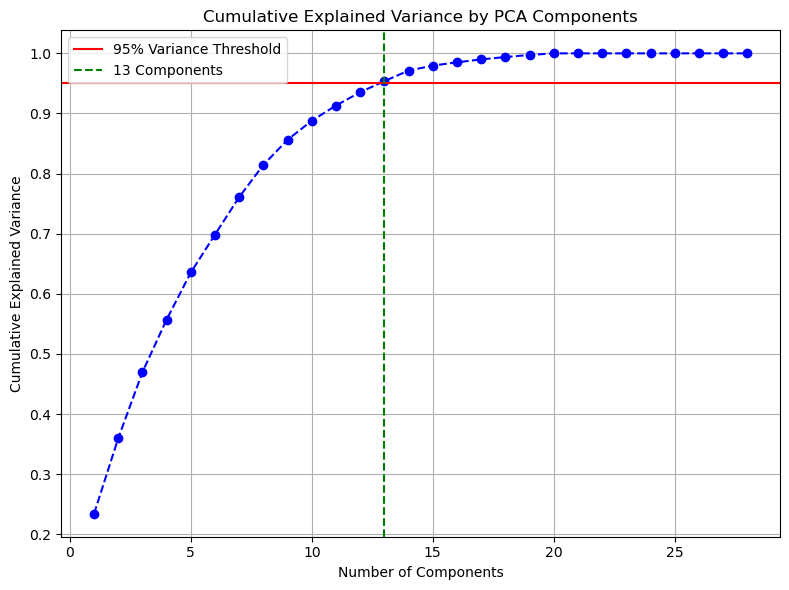

In [7]:

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## scatter plot

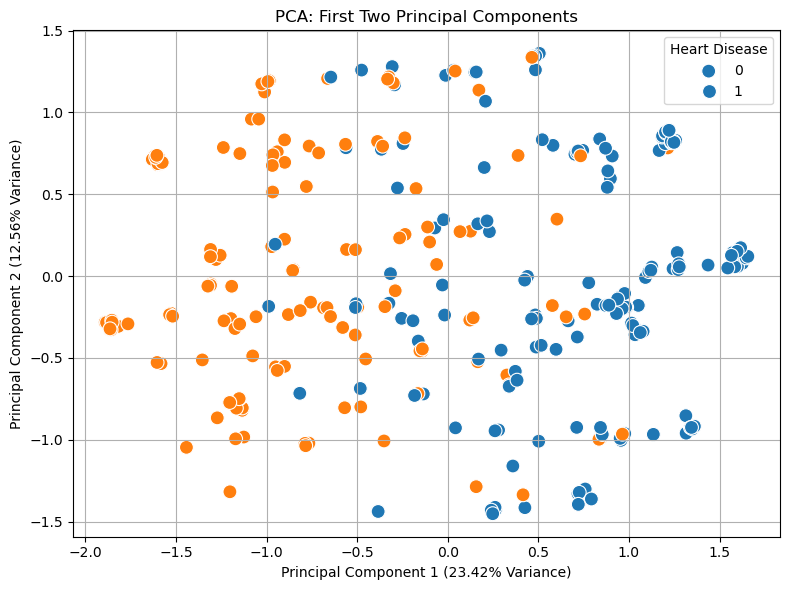

In [13]:
pca_columns = [f'PC{i+1}' for i in range(df_pca.shape[1])]  
df_pca = pd.DataFrame(df_pca, columns=pca_columns)  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], color=['blue', 'orange'], hue=y, s=100)
plt.title('PCA: First Two Principal Components')
plt.xlabel(f'Principal Component 1 ({explained_variace_retio[0]:.2%} Variance)')
plt.ylabel(f'Principal Component 2 ({explained_variace_retio[1]:.2%} Variance)')
plt.legend(title='Heart Disease', labels=y.unique())
plt.grid(True)
plt.tight_layout()
plt.show()

# useing num of componants reach 95 variance

In [14]:
pca = PCA(n_components=n_components_95)
pca_transformed = pca.fit_transform(x)
pca_df = pd.DataFrame(pca_transformed,columns=[f'PC{i+1}' for i in range(n_components_95)])
pca_df['num']= y
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,num
0,-0.017550,-0.237562,1.130701,-0.690074,0.292001,0.746005,-0.727584,-0.910318,0.184558,-0.343690,1.367181,0.350511,0.598685,0
1,-1.134815,-0.819412,0.053161,0.362202,0.174615,0.095826,0.764537,-0.511039,-0.343816,0.239566,-0.109062,-0.552569,-0.677350,1
2,-1.865945,-0.325919,0.117007,0.154059,0.059297,-0.125068,-0.099045,-0.030261,-0.041109,0.854383,-0.199566,0.011509,0.022689,1
3,0.897661,0.596087,-0.085740,-0.633255,0.388291,0.411199,0.406543,-0.039662,-0.521288,0.125395,0.995098,-0.390647,-0.211833,0
4,1.314315,-0.852504,0.291158,0.523258,0.308332,-0.268851,-0.274715,0.190862,0.800398,0.029966,-0.049335,-0.180443,0.074683,0


# saving new df

In [15]:
pca_df.to_csv('../data/heart_disease_PCA.csv', index=False)